<a href="https://colab.research.google.com/github/Vanz92x/IT-Specialist-Data-Analytics-3/blob/main/End_to_End_Project_with_CRISP_DM_Concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Shopping Trends**

## **Business Understanding**

**Background:**

The retail store data reflects information about purchases made by a number of customers. This is valuable data for conducting analyses on purchasing preferences, consumer behavior, seasonal trends, as well as the effectiveness of promotional programs and discounts. By analyzing this data, companies can make better decisions regarding product stock, marketing strategies, and customer service.

**Business Question:**

1. In which season do customers make the most purchases?

2. How do Review Ratings for clothing vary based on their categories?

3. What is the count of customers for each type of shipping?

4. Who are the most frequent buyers based on gender?

5. Which payment method is most commonly used by male buyers?


## **Data Understanding**

Source data: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

The dataset has 19 columns and 3900 rows.

Data Dictionary:

* Customer ID - Unique identifier for each customer

* Age - Age of the customer

* Gender - Gender of the customer (Male/Female)

* Item Purchased - The item purchased by the customer

* Category - Category of the item purchased

* Purchase Amount (USD) - The amount of the purchase in USD

* Location - Location where the purchase was made

* Size - Size of the purchased item

* Color - Color of the purchased item

* Season - Season during which the purchase was made

* Review Rating - Rating given by the customer for the purchased item

* Subscription Status - Indicates if the customer has a subscription (Yes/No)

* Shipping Type - Type of shipping chosen by the customer

* Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)

* Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)

* Previous Purchases - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction

* Payment Method - Customer's most preferred payment method

* Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)



## **Data Preparation**

* Code Used:

* Python Version: 3.11.7

* Packages: Numpy, Matplotlib, Seaborn, Pandas.

## **Run Libraries and Import Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print("Version Pandas:", pd.__version__)
print("Version NumPy:", np.__version__)
print("Version Matplotlib:", plt.matplotlib.__version__)
print("Version Seaborn:", sns.__version__)

Version Pandas: 2.1.4
Version NumPy: 1.26.4
Version Matplotlib: 3.8.0
Version Seaborn: 0.12.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#path ke file csv di google drive
file_path = '/content/drive/My Drive/dataset/shopping_trends.csv'

In [ ]:
#membaca dataset
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## **Data Cleansing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

The table above shows that there are **no missing values** and **all column data types are appropriate.**

## **EDA (Exploratory Data Analysis)**

### 1. In which season do customers make the most purchases?

In [ ]:
df['Season'].mode()[0]

'Spring'

In [ ]:
df['Season'].count()

3900

In [ ]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

Pivot Table:
        Customer ID
Season             
Spring          999
Fall            975
Winter          971
Summer          955


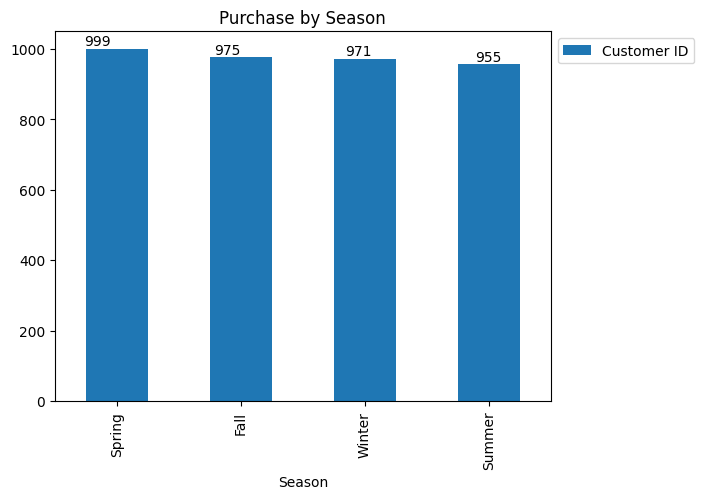

In [ ]:
def make_pivot(param1):
    df_slice = df[[param1, 'Customer ID']]
    slice_pivot = df_slice.pivot_table(index=[param1], aggfunc=np.size, fill_value=0)

    slice_pivot_sorted = slice_pivot.sort_values(by='Customer ID', ascending=False)

    p_chart = slice_pivot_sorted.plot(kind='bar')
    plt.title("Purchase by Season")
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))

    p_chart.legend(loc='upper left', bbox_to_anchor=(1, 1))

    return slice_pivot_sorted, p_chart

pivot_table, bar_chart = make_pivot('Season')
print("Pivot Table:")
print(pivot_table)
plt.show()

In the diagram above, it can be seen that **in the spring season, retail shop buyers made a lot of purchases** with the number of buyers reaching 999 buyers. Meanwhile **summer is the season with the fewest retail shop buyers** making purchases with a total of 955 buyers.

### 2. How do Review Ratings for clothing vary based on their categories?


In [ ]:
average_ratings = df.groupby('Category')['Review Rating'].mean()

print(average_ratings)

Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review Rating, dtype: float64


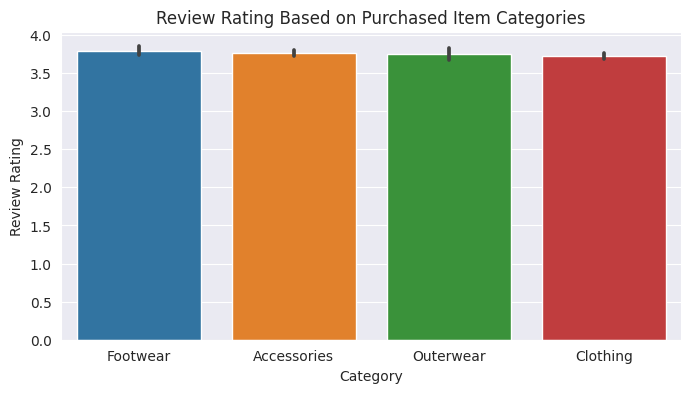

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x ='Category',
            y ='Review Rating',
            data = df ,
            order = df.groupby('Category')
            ['Review Rating'].mean().sort_values(ascending=False).index)

plt.title('Review Rating Based on Purchased Item Categories')
sns.set_style('darkgrid')
plt.show()

Based on the diagram above, it can be seen that each category has a review rating above 3.5. The diagram also shows that **the clothing category with the highest rating is footwear** with the highest rate at 3.76. Meanwhile **on average, buyers do the most review ratings in the outerwear category.**

### 3. What is the count of customers for each type of shipping?

Pivot Table:
                Customer ID
Shipping Type              
Free Shipping           675
Standard                654
Store Pickup            650
Next Day Air            648
Express                 646
2-Day Shipping          627


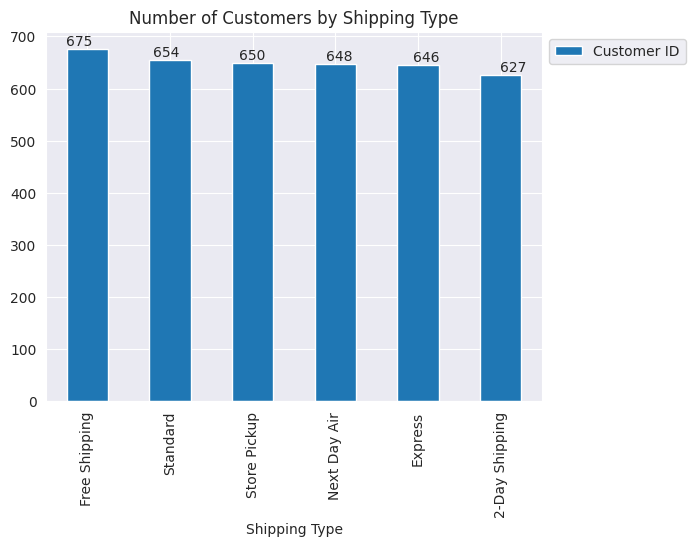

In [ ]:
def make_pivot(param1):
    df_slice = df[[param1, 'Customer ID']]
    slice_pivot = df_slice.pivot_table(index=[param1], aggfunc=np.size, fill_value=0)

    slice_pivot_sorted = slice_pivot.sort_values(by='Customer ID', ascending=False)

    p_chart = slice_pivot_sorted.plot(kind='bar')
    plt.title("Number of Customers by Shipping Type")
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))

    p_chart.legend(loc='upper left', bbox_to_anchor=(1, 1))

    return slice_pivot_sorted, p_chart

pivot_table, bar_chart = make_pivot('Shipping Type')
print("Pivot Table:")
print(pivot_table)
plt.show()

Based on the diagram above, we can see the number of customers who use each shipping type, we can see the shipping type preferences that are most widely used among them. Free Shipping has the largest number of customers with 675 customers, which means that in this case **the majority of customers prefer the free shipping option.**

### 4. Who are the most frequent buyers based on gender?

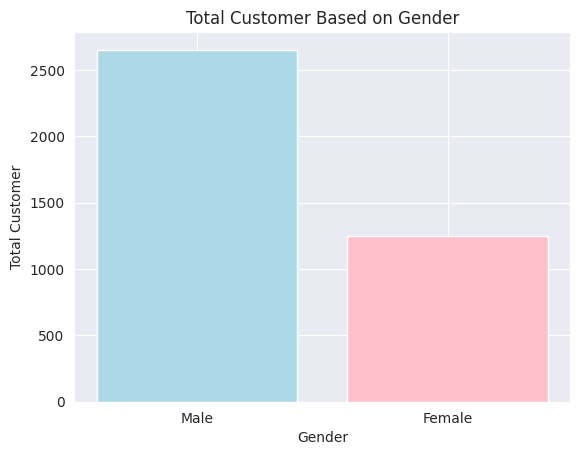

In [ ]:
customer_by_gender = df['Gender'].value_counts()

customer_by_gender

gender_counts = df['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'pink'])
plt.title('Total Customer Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Total Customer')
plt.show()

Based on the diagram above, **the number of male buyers making the most purchases** is 2,652 compared to female buyers who are only half as many as male buyers, namely around 1,248 buyers with the difference between the two being around 1,404 purchases.

### 5. Which payment method is most commonly used by male buyers?

(               Customer ID
 Gender                Male
 Payment Method            
 Bank Transfer          428
 Cash                   451
 Credit Card            473
 Debit Card             426
 PayPal                 435
 Venmo                  439,
 <Axes: title={'center': 'Payment Method Based on Gender Male'}, ylabel='Payment Method'>)

<Figure size 1500x1000 with 0 Axes>

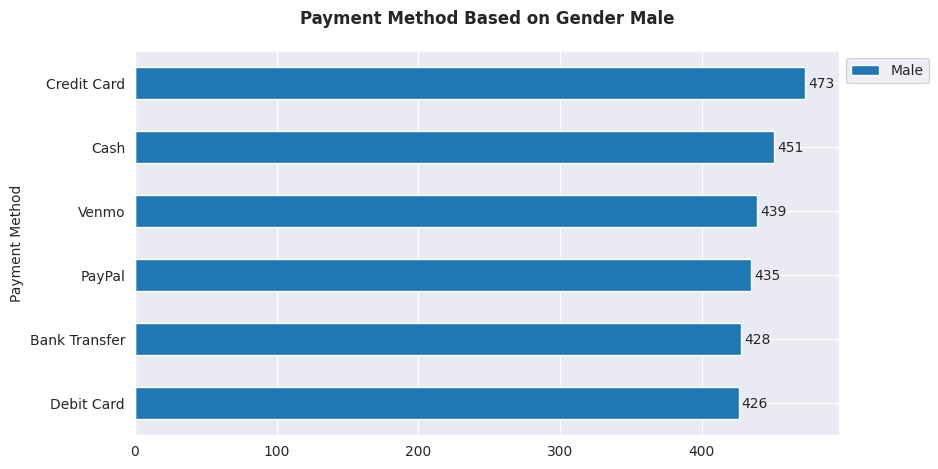

In [ ]:
def make_pivot(df, param1, param2):
    df_slice = df[[param1, param2, 'Customer ID']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], \
                                       aggfunc=np.size, fill_value=0)
    plt.figure(figsize=(15, 10))
    slice_pivot_sorted = slice_pivot.sort_values(by=('Customer ID', 'Male'), ascending=True)

    p_chart = slice_pivot_sorted.plot(kind='barh')

    plt.title("Payment Method Based on Gender Male", y=1.05, fontweight='bold')
    for p in p_chart.patches:
        width = p.get_width()
        plt.text(width * 1.005, p.get_y() + p.get_height() / 2,
                 f'{int(width)}', va='center')

    for spine in plt.gca().spines.values():
        spine.set_linewidth(1)

    p_chart.legend_.remove()

    plt.legend(['Male'], loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.subplots_adjust(left=0.1, right=1.2, top=0.9, bottom=0.1)

    return slice_pivot, p_chart

df_filtered = df[df['Gender'] == 'Male']
make_pivot(df_filtered, 'Payment Method', 'Gender')

From the graph above, it can be seen that **male buyers tend to prefer using credit cards** as a payment method, with a total of 473 users. On the other hand, **the use of debit cards is less popular among male buyers**, only reached 426.

## **Summary**

* The majority of retail purchases are made during the spring season.
* Footwear are the most purchased category based on review rating.
* Male buyers dominate with a total of 2,652.
* Male buyers are more likely to use credit card payment methods.
* Many shoppers prefer shipping methods with free shipping options.